# 1. 강의영상 

{{<video ???? >}}

# 2. Imports 

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#"
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,50.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


# 4. 적합  

In [4]:
# step1 -- pass 
# step4 
predictr = TabularPredictor(label = 'ice_sales')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train) 

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_191652/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_191652/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.64 GB / 1887.51 GB (84.0%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: ice_sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (50.0, 8.273155164108418, 13.17881, 4.33788)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFe

[1000]	valid_set's rmse: 1.69432


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
	-1.6843	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.562	 = Validation score   (-root_mean_squared_error)
	0.48s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	Training CatBoost with GPU, note that this may negatively impact model quality compared to CPU training.
	-1.3746	 = Validation score   (-root_mean_squared_error)
	1.39s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.8631	 = Validation score   (-root_mean_squared_error)
	0.37s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 8: early stopping
	-1.5704	 = Validation score   (-root_mean_squared_error)
	2.47s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...


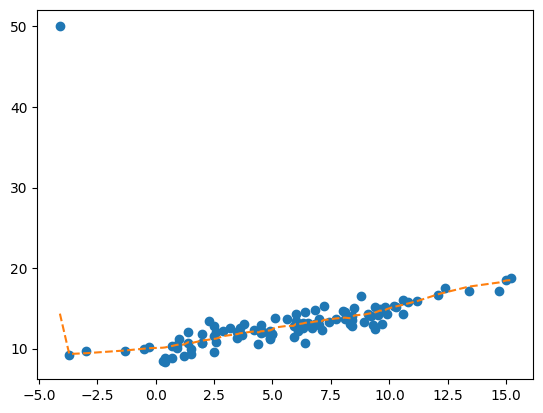

In [5]:
plt.plot(df_train.temp,df_train.ice_sales,'o')
plt.plot(df_train.temp,yhat,'--')

In [19]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.170356,0.008300,2.729428,0.000325,0.244343,2,True,12
1,NeuralNetTorch,-1.188107,0.003044,0.663559,0.003044,0.663559,1,True,10
2,XGBoost,-1.301729,0.003715,0.712131,0.003715,0.712131,1,True,9
3,CatBoost,-1.374554,0.002971,1.391938,0.002971,1.391938,1,True,6
4,NeuralNetFastAI,-1.570421,0.005400,2.465239,0.005400,2.465239,1,True,8
5,LightGBM,-1.684257,0.001216,1.109396,0.001216,1.109396,1,True,4
6,ExtraTreesMSE,-1.863058,0.046813,0.374786,0.046813,0.374786,1,True,7
7,LightGBMLarge,-2.079816,0.000856,0.230285,0.000856,0.230285,1,True,11
8,KNeighborsUnif,-2.275639,0.030938,0.004831,0.030938,0.004831,1,True,1
9,RandomForestMSE,-2.561995,0.045354,0.480119,0.045354,0.480119,1,True,5


# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
ice_sales,100,13.178805,4.337878,8.273155,11.296645,12.856589,14.294614,50.0,float64,100,,,float,


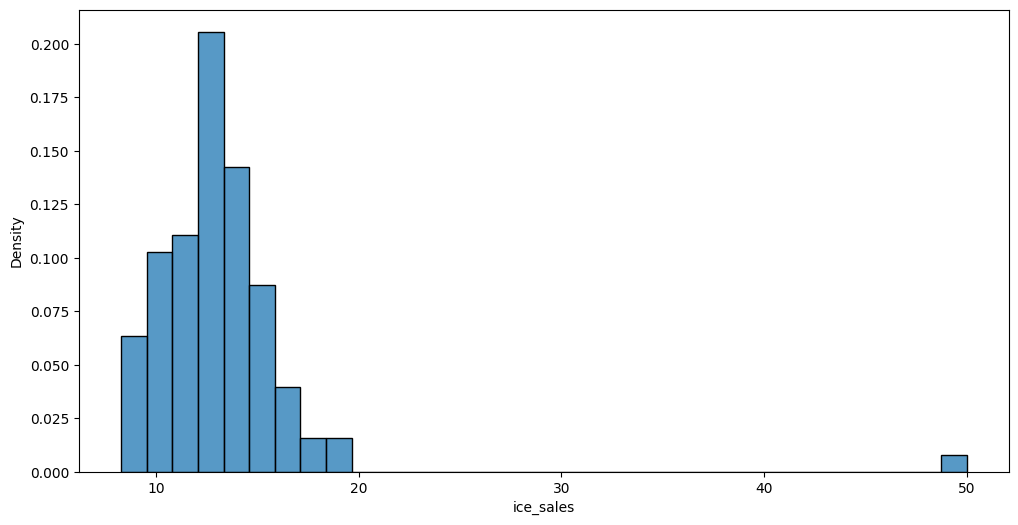

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `ice_sales` >= `0.5`**

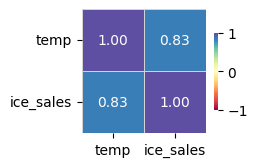

**Feature interaction between `temp`/`ice_sales` in `train_data`**

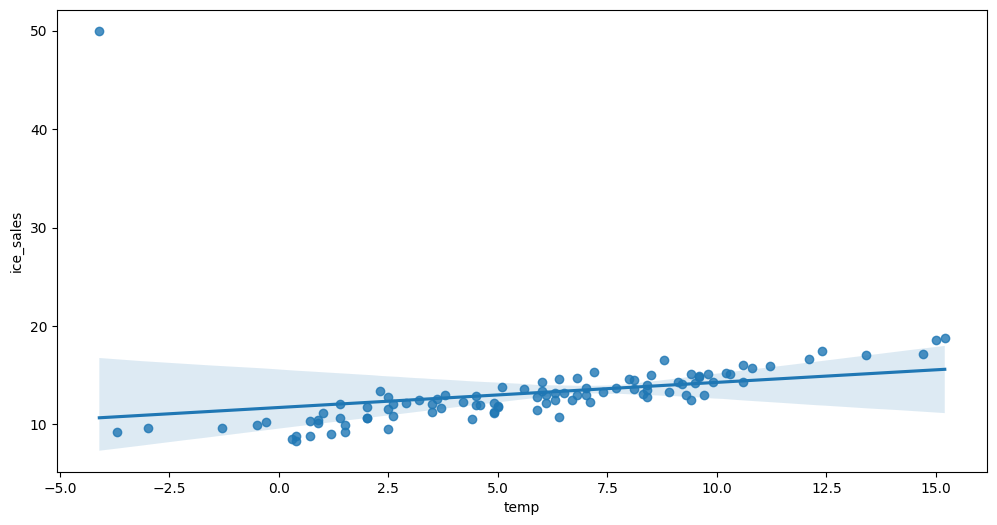

In [7]:
auto.target_analysis(
    train_data=df_train, 
    label='ice_sales',
    fit_distributions=False
)

## B. 중요한 설명변수? 

In [8]:
pass # 설명변수가 하나라서..

## C. 관측치별 해석 

In [11]:
df_train.iloc[[0]]

,temp,ice_sales
0,-4.1,50.0


In [12]:
predictr.predict(df_train.iloc[[0]])

0    14.337484
Name: ice_sales, dtype: float32

,temp,ice_sales
0,-4.1,50.0


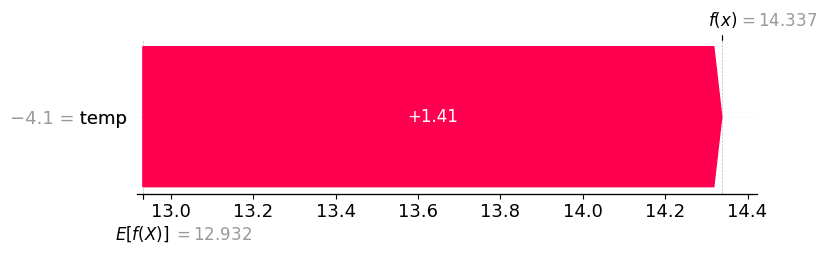

In [9]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]
)